<a href="https://colab.research.google.com/github/BetoxAlka/AnaliticaDatos_Equipo3/blob/main/Actividad3-8/Act3_8_Geneva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 3.6: Regresión No Lineal Geneva Airbnb


## Generación del Frame

In [1]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
#Cargar un archivo
from google.colab import files
files.upload()

Saving geneva_listing_clean.csv to geneva_listing_clean.csv


{'geneva_listing_clean.csv': b',host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_c

In [ ]:
#Ajustar el maximo de columnas
pd.options.display.max_columns = None

#Ajustar el maximo de filas
pd.options.display.max_rows = None

In [3]:
#Crear DataFrame
data = pd.read_csv('geneva_listing_clean.csv',encoding='utf-8',index_col=0)
data.shape

(2685, 60)

In [4]:
#Se corrobora que no haya valores nulos
valores_nulos = data.isnull().sum()
valores_nulos

host_id                                         0
host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0
review_scores_checkin                           0
review_scores_communication                     0
review_scores_location                          0
review_scores_value                             0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
host_name                                       0
host_since                                      0
host_location                                   0
host_response_time                              0
host_is_superhost                               0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
property_type                                   0
room_type                                       0
bathrooms_text                                  0
amenities                                       0
has_availability                                0
calendar_last_scraped                           0
first_review                                    0
last_review                                     0
instant_bookable                                0
dtype: int64

# Regresión No Lineal

Para esta actividad, se nos solicita analizar la correlación que existe entre las siguientes variables: host_response_rate (variable objetivo), host_acceptance_rate (variable objetivo), host_total_listings_count (variable objetivo), accommodates (variable objetivo), reviews_per_month (variable objetivo) y price(variable objetivo). Aplicando 2 métodos de Regresión No Lineal, buscando el que coeficiente de correlación resultante sea mayor a la correlación lineal del Mapa de Calor.

## Coeficientes de Correlación Lineales

Utilizando el método de generación del Heat Map, podemos conocer los valores de las correlaciones entre variables de manera lineal.

In [7]:
#Se crea una copia del frame original
data_cuant = data.copy()

In [8]:
#Se eliminan columnas innecesarias
data_cuant.drop(['last_scraped','source','name','description','host_name','host_since','host_location','host_response_time','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','property_type','bathrooms_text','amenities','has_availability','calendar_last_scraped','first_review','last_review','host_is_superhost','room_type','instant_bookable'],axis=1,inplace=True)
data_cuant.shape

(2685, 38)

In [9]:
#Verificar que todas las columnas sean cuantitativas
data_cuant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2685 entries, 0 to 2684
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_id                                       2685 non-null   int64  
 1   host_response_rate                            2685 non-null   float64
 2   host_acceptance_rate                          2685 non-null   float64
 3   host_listings_count                           2685 non-null   float64
 4   host_total_listings_count                     2685 non-null   float64
 5   latitude                                      2685 non-null   float64
 6   longitude                                     2685 non-null   float64
 7   accommodates                                  2685 non-null   float64
 8   bathrooms                                     2685 non-null   float64
 9   bedrooms                                      2685 non-null   float6

In [10]:
#Encontramos todos los coeficientes de correlacion entre las variables
corr_factors = data_cuant.corr()
corr_factors

host_id  host_response_rate  \
host_id                                       1.000000           -0.014853   
host_response_rate                           -0.014853            1.000000   
host_acceptance_rate                          0.028688            0.238429   
host_listings_count                           0.042958           -0.057497   
host_total_listings_count                    -0.016842           -0.098990   
latitude                                      0.059817            0.062515   
longitude                                    -0.053456           -0.065448   
accommodates                                 -0.097824           -0.003929   
bathrooms                                          NaN                 NaN   
bedrooms                                           NaN                 NaN   
beds                                         -0.068568            0.044307   
price                                        -0.051473           -0.051101   
minimum_nights                               -0.127551           -0.048509   
maximum_nights                               -0.137925           -0.061409   
minimum_minimum_nights                       -0.133252           -0.065364   
maximum_minimum_nights                       -0.130156           -0.041182   
minimum_maximum_nights                       -0.155585            0.047830   
maximum_maximum_nights                       -0.154771            0.059687   
minimum_nights_avg_ntm                       -0.125510           -0.050617   
maximum_nights_avg_ntm                       -0.158482            0.054498   
availability_30                               0.159330            0.065201   
availability_60                               0.158730            0.069172   
availability_365                              0.041657            0.076537   
number_of_reviews                            -0.139313            0.112427   
number_of_reviews_ltm                         0.017101            0.085381   
number_of_reviews_l30d                        0.014371            0.045589   
review_scores_rating                         -0.022638            0.077197   
review_scores_accuracy                        0.035268            0.035414   
review_scores_cleanliness                     0.031954            0.080633   
review_scores_checkin                         0.006326            0.058740   
review_scores_communication                  -0.034478            0.087850   
review_scores_location                        0.027073           -0.020093   
review_scores_value                           0.011470            0.093830   
calculated_host_listings_count                0.068933           -0.012479   
calculated_host_listings_count_entire_homes   0.032487           -0.015725   
calculated_host_listings_count_private_rooms -0.009564           -0.053623   
calculated_host_listings_count_shared_rooms        NaN                 NaN   
reviews_per_month                             0.129434            0.015540   

                                              host_acceptance_rate  \
host_id                                                   0.028688   
host_response_rate                                        0.238429   
host_acceptance_rate                                      1.000000   
host_listings_count                                       0.053048   
host_total_listings_count                                 0.019214   
latitude                                                  0.081655   
longitude                                                -0.026279   
accommodates                                              0.077970   
bathrooms                                                      NaN   
bedrooms                                                       NaN   
beds                                                      0.039679   
price                                                     0.021047   
minimum_nights                                           -0.132477   
maximum_nights          

In [11]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
corr_factors1 = abs(corr_factors)
corr_factors1

host_id  host_response_rate  \
host_id                                       1.000000            0.014853   
host_response_rate                            0.014853            1.000000   
host_acceptance_rate                          0.028688            0.238429   
host_listings_count                           0.042958            0.057497   
host_total_listings_count                     0.016842            0.098990   
latitude                                      0.059817            0.062515   
longitude                                     0.053456            0.065448   
accommodates                                  0.097824            0.003929   
bathrooms                                          NaN                 NaN   
bedrooms                                           NaN                 NaN   
beds                                          0.068568            0.044307   
price                                         0.051473            0.051101   
minimum_nights                                0.127551            0.048509   
maximum_nights                                0.137925            0.061409   
minimum_minimum_nights                        0.133252            0.065364   
maximum_minimum_nights                        0.130156            0.041182   
minimum_maximum_nights                        0.155585            0.047830   
maximum_maximum_nights                        0.154771            0.059687   
minimum_nights_avg_ntm                        0.125510            0.050617   
maximum_nights_avg_ntm                        0.158482            0.054498   
availability_30                               0.159330            0.065201   
availability_60                               0.158730            0.069172   
availability_365                              0.041657            0.076537   
number_of_reviews                             0.139313            0.112427   
number_of_reviews_ltm                         0.017101            0.085381   
number_of_reviews_l30d                        0.014371            0.045589   
review_scores_rating                          0.022638            0.077197   
review_scores_accuracy                        0.035268            0.035414   
review_scores_cleanliness                     0.031954            0.080633   
review_scores_checkin                         0.006326            0.058740   
review_scores_communication                   0.034478            0.087850   
review_scores_location                        0.027073            0.020093   
review_scores_value                           0.011470            0.093830   
calculated_host_listings_count                0.068933            0.012479   
calculated_host_listings_count_entire_homes   0.032487            0.015725   
calculated_host_listings_count_private_rooms  0.009564            0.053623   
calculated_host_listings_count_shared_rooms        NaN                 NaN   
reviews_per_month                             0.129434            0.015540   

                                              host_acceptance_rate  \
host_id                                                   0.028688   
host_response_rate                                        0.238429   
host_acceptance_rate                                      1.000000   
host_listings_count                                       0.053048   
host_total_listings_count                                 0.019214   
latitude                                                  0.081655   
longitude                                                 0.026279   
accommodates                                              0.077970   
bathrooms                                                      NaN   
bedrooms                                                       NaN   
beds                                                      0.039679   
price                                                     0.021047   
minimum_nights                                            0.132477   
maximum_nights          

<Axes: >

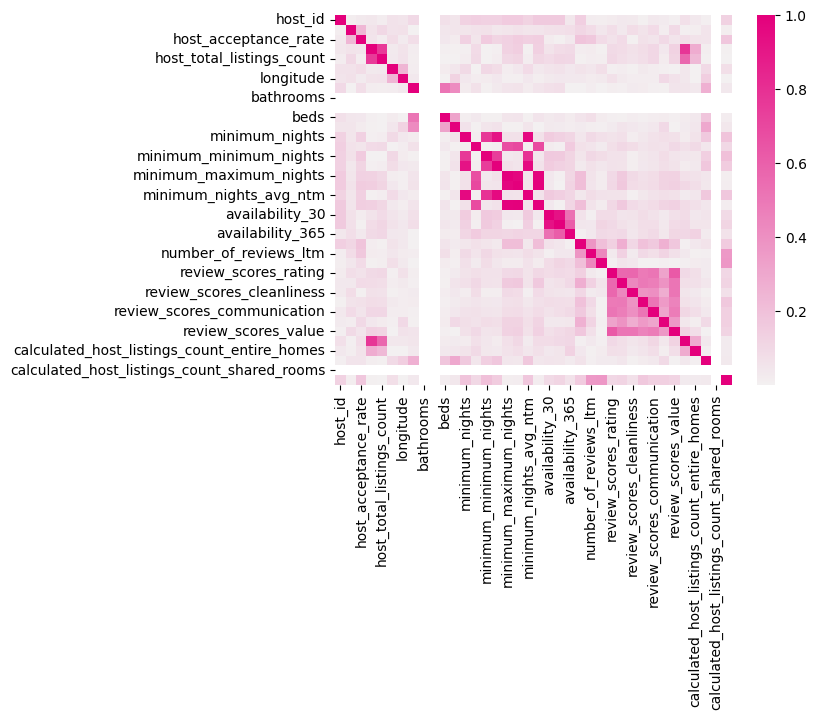

In [17]:
#Ajustemos el mapa del calor de los coeficientes de correlación
pink_palette = sns.light_palette("#E4007C", as_cmap=True)
Heat_Map = sns.heatmap(corr_factors1, cmap=pink_palette)
Heat_Map

## Gráficas de Variables a Analizar

De las 6 variables objetivo resultara útil para el analisis obtener sus gráficas para poder facilitar la elección del modelo No Lineal a utilizar.

In [18]:
data_results = data_cuant[['host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'accommodates', 'reviews_per_month', 'price']]
data_results.head(3)

host_response_rate  host_acceptance_rate  host_total_listings_count  \
0               100.0                  80.0                        1.0   
1               100.0                 100.0                       12.0   
2               100.0                 100.0                        2.0   

   accommodates  reviews_per_month   price  
0           1.0               0.50   75.65  
1           2.0               0.62  140.25  
2           3.0               0.80   66.30

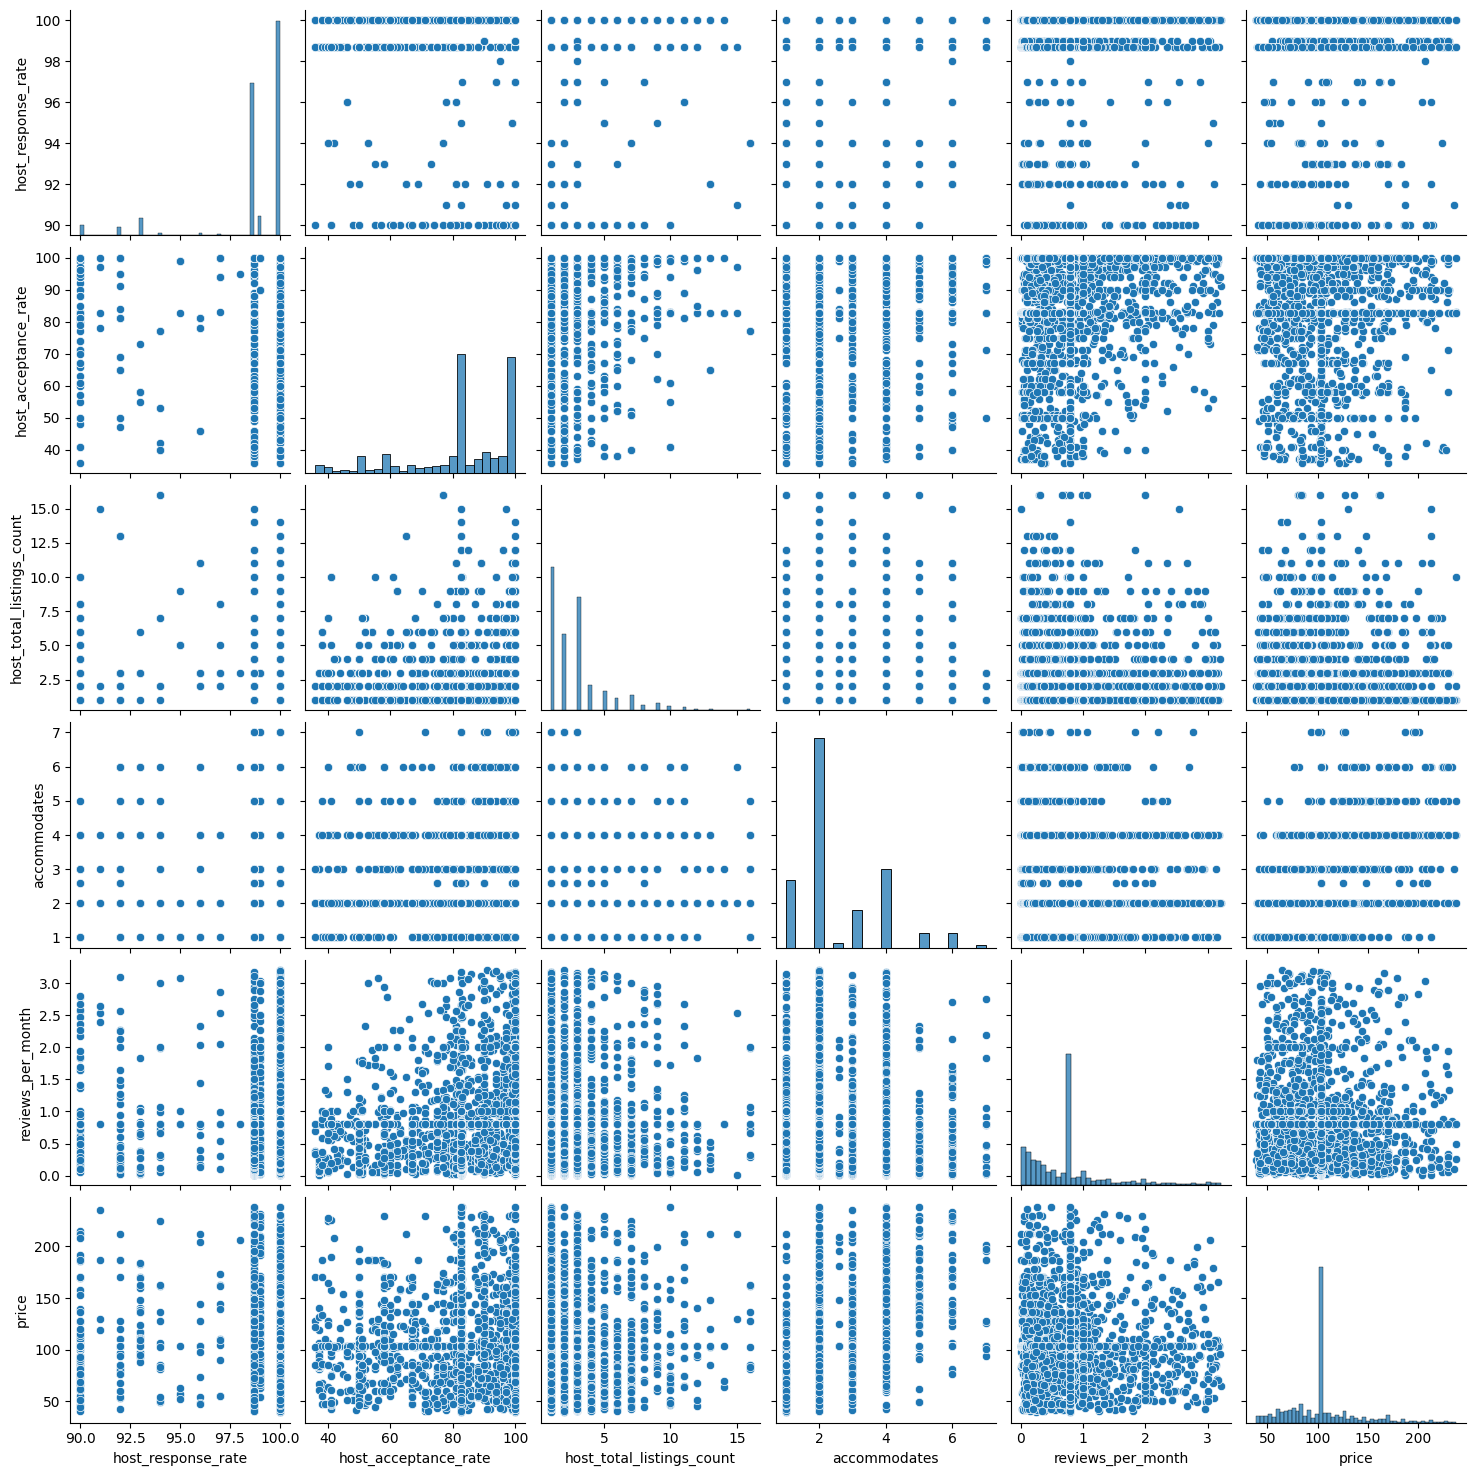

In [25]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(data_results)

## Modelación

Utilizando los datos obtenidos anteriormente, creamos los modelos No Lineales pertinentes a cada una de las 6 variables, eleguiendo tanto dos modelos, cómo también las variables independientes que consideremos pertinentes

Los modelos que se pueden utilizar son los siguientes:

        y = ax^2 + bx + c   ("Función cuadrática")

        y = a*exp(-bx) + c   ("Función exponencial")

        y = 1/a*x           ("Función inversa")

        y = a*np.sin(x) + b ("Función senoidal")

        y = a*np.tan(x) + b ("Función tangencial")

        y = a*np.abs(x) + b*x + c (Función Valor absoluto)

        y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

        y = a*np.log(x) + b  (Función logaritmica)

        y = a*x + b*x + c*x (Función lineal con producto de coeficientes)

        y = 1/a*x**2  (Función cuadrática inversa)

        y = a/b*x**2 + c*x (Función polinomial inversa)

### Host Response Rate

In [26]:
#Declaramos las variables dependientes e independientes para la regresion No Lineal
x_1 = data_cuant[['availability_365']]
y_1 = data_cuant[['host_response_rate']]
# Coeficiente de Correlacion Lineal 0.288016

#### Modelo 1

In [27]:
#Definimos la funcion del modelo
#y = ax^2 + bx + c   ("Función cuadrática")
def func_1A(x,a,b,c):
  return a*x**2 + b*x + c

In [28]:
#Ajustamos los parametros de la funcion curve_fit
parametros_1A, covs_1A = curve_fit(func_1A, data_cuant['availability_365'], data_cuant['host_response_rate'], maxfev=5000)

In [29]:
#Predicciones
y_pred_1A = func_1A(x_1, *parametros_1A)

<ipython-input-34-e4a3112bc0c8>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_1,y_1, 'bo', color='pink', label='y-original')


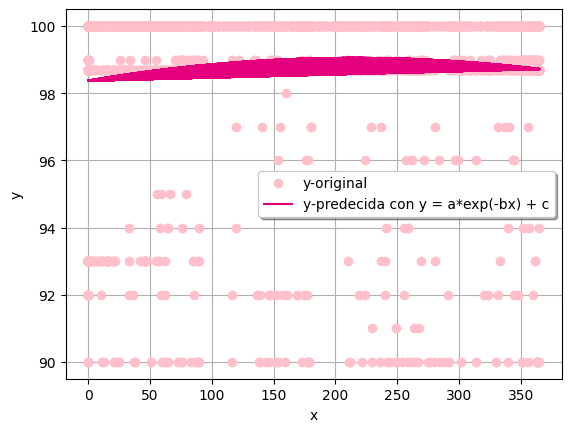

In [34]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_1,y_1, 'bo', color='pink', label='y-original')
plt.plot(x_1,y_pred_1A,color='#E4007C',label='y-predecida con y = a*exp(-bx) + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [35]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_1A = r2_score(y_1, y_pred_1A)
r2_modelo_1A

0.011787238218070262

In [36]:
#Calculamos el coeficiente de correlacion del modelo
r_1A = np.sqrt(abs(r2_modelo_1A))
r_1A

0.10856904815862697

#### Modelo 2

In [37]:
#Definimos la funcion del modelo
#y = a*np.abs(x) + b*x + c (Función Valor absoluto)
def func_1B(x,a,b,c):
  return a*np.abs(x) + b*x + c

In [38]:
#Ajustamos los parametros de la funcion curve_fit
parametros_1B, covs_1B = curve_fit(func_1B, data_cuant['availability_365'], data_cuant['host_response_rate'], maxfev=5000)

In [39]:
#Predicciones
y_pred_1B = func_1B(x_1, *parametros_1B)

<ipython-input-40-a2a0abb6f52c>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_1,y_1, 'bo', color='pink', label='y-original')


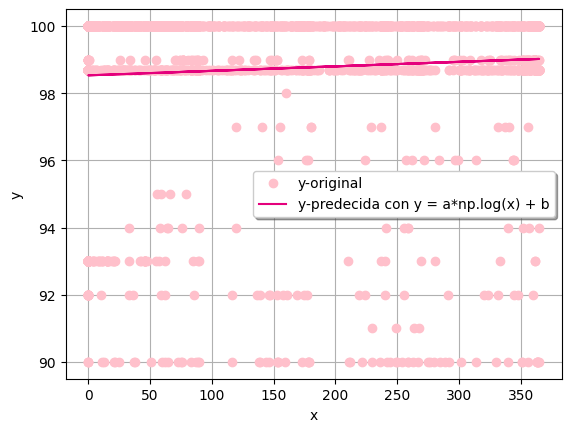

In [40]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_1,y_1, 'bo', color='pink', label='y-original')
plt.plot(x_1,y_pred_1B, color='#E4007C', label='y-predecida con y = a*np.log(x) + b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [41]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_1B = r2_score(y_1, y_pred_1B)
r2_modelo_1B

0.00585797109790287

In [42]:
#Calculamos el coeficiente de correlacion del modelo
r_1B = np.sqrt(abs(r2_modelo_1B))
r_1B

0.07653738366251403

### Host Acceptance Rate

In [43]:
#Declaramos las variables dependientes e independientes para la regresion No Lineal
x_2 = data_cuant[['maximum_minimum_nights']]
y_2 = data_cuant[['host_acceptance_rate']]
# Coeficiente de Correlacion Lineal 0.436564

#### Modelo 1

In [44]:
#Definimos la funcion del modelo | cuadratica, exponencial
#y = ax^2 + bx + c   ("Función cuadrática")
def func_2A(x,a,b,c):
  return a*x**2 + b*x + c

In [45]:
#Ajustamos los parametros de la funcion curve_fit
parametros_2A, covs_2A = curve_fit(func_2A, data_cuant['maximum_minimum_nights'], data_cuant['host_acceptance_rate'], maxfev=5000)

In [46]:
#Predicciones
y_pred_2A = func_2A(x_2, *parametros_2A)

<ipython-input-47-f4b5497405d2>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_2,y_2, 'bo', color='pink', label='y-original')


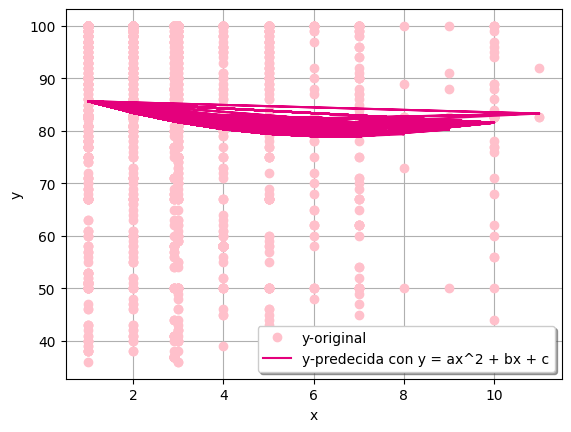

In [47]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_2,y_2, 'bo', color='pink', label='y-original')
plt.plot(x_2,y_pred_2A, color='#E4007C', label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [48]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_2A = r2_score(y_2, y_pred_2A)
r2_modelo_2A

0.01852477628857574

In [49]:
#Calculamos el coeficiente de correlacion del modelo
r_2A = np.sqrt(abs(r2_modelo_2A))
r_2A

0.13610575406122893

#### Modelo 2

In [50]:
#Definimos la funcion del modelo
#y = a*exp(-bx) + c   ("Función exponencial")
def func_2B(x,a,b,c):
  return a*np.exp(-b*x) + c

In [51]:
#Ajustamos los parametros de la funcion curve_fit
parametros_2B, covs_2B = curve_fit(func_2B, data_cuant['maximum_minimum_nights'], data_cuant['host_acceptance_rate'], maxfev=5000)

In [52]:
#Predicciones
y_pred_2B = func_2B(x_2, *parametros_2B)

<ipython-input-53-63b7bf2ce7f9>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_2,y_2, 'bo',color='pink', label='y-original')


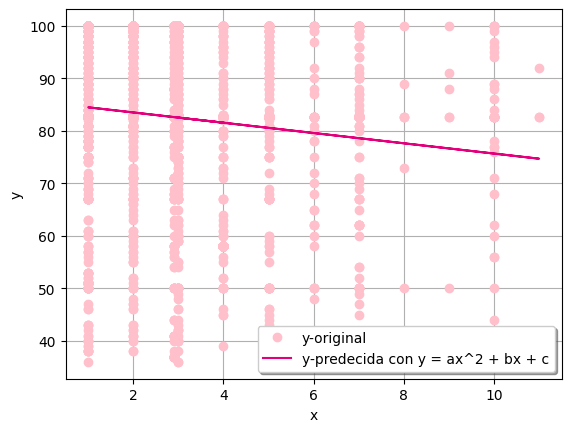

In [53]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_2,y_2, 'bo',color='pink', label='y-original')
plt.plot(x_2,y_pred_2B,color='#E4007C', label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [54]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_2B = r2_score(y_2, y_pred_2B)
r2_modelo_2B

0.013097916310491287

In [55]:
#Calculamos el coeficiente de correlacion del modelo
r_2B = np.sqrt(abs(r2_modelo_2B))
r_2B

0.11444612842071718

### Host Total Listings Count

In [56]:
#Declaramos las variables dependientes e independientes para la regresion No Lineal
x_3 = data_cuant[['calculated_host_listings_count']]
y_3 = data_cuant[['host_total_listings_count']]
# Coeficiente de Correlacion Lineal 0.745230

#### Modelo 1

In [57]:
#Definimos la funcion del modelo | cuadratica, abs?,
#y = ax^2 + bx + c   ("Función cuadrática")
def func_3A(x,a,b,c):
  return a*x**2 + b*x + c

In [58]:
#Ajustamos los parametros de la funcion curve_fit
parametros_3A, covs_3A = curve_fit(func_3A, data_cuant['calculated_host_listings_count'], data_cuant['host_total_listings_count'], maxfev=5000)

In [59]:
#Predicciones
y_pred_3A = func_3A(x_3, *parametros_3A)

<ipython-input-61-3f1af31dd386>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_3,y_3, 'bo',color='pink', label='y-original')


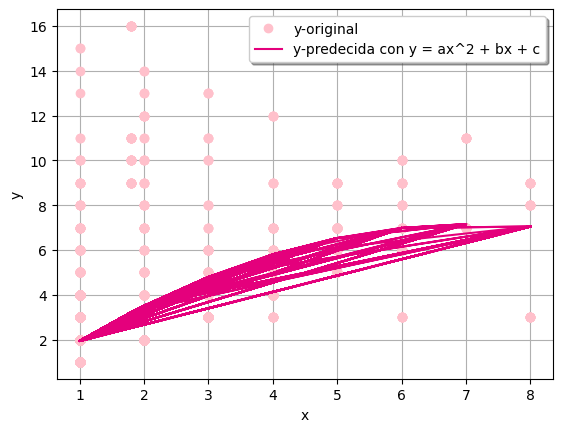

In [61]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_3,y_3, 'bo',color='pink', label='y-original')
plt.plot(x_3,y_pred_3A,color='#E4007C', label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [62]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_3A = r2_score(y_3, y_pred_3A)
r2_modelo_3A

0.3496392571883655

In [63]:
#Calculamos el coeficiente de correlacion del modelo
r_3A = np.sqrt(abs(r2_modelo_3A))
r_3A

0.5913030163870007

#### Modelo 2

In [64]:
#Definimos la funcion del modelo
#y = a*np.abs(x) + b*x + c (Función Valor absoluto)
def func_3B(x,a,b,c):
  return a*np.abs(x) + b*x + c

In [65]:
#Ajustamos los parametros de la funcion curve_fit
parametros_3B, covs_3B = curve_fit(func_3B, data_cuant['calculated_host_listings_count'], data_cuant['host_total_listings_count'], maxfev=5000)

In [66]:
#Predicciones
y_pred_3B = func_3B(x_3, *parametros_3B)

<ipython-input-68-cdfc18920528>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_3,y_3, 'bo', color='pink',label='y-original')


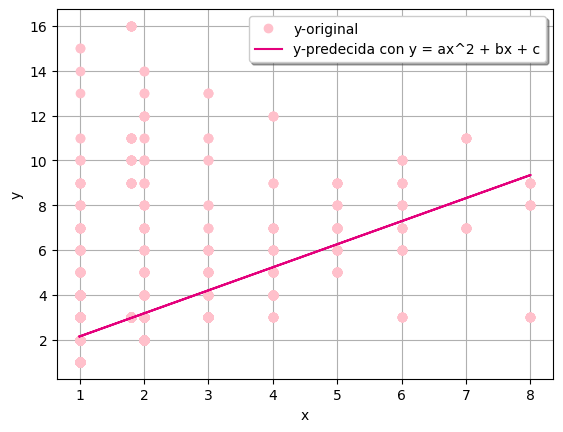

In [68]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_3,y_3, 'bo', color='pink',label='y-original')
plt.plot(x_3,y_pred_3B,color='#E4007C', label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [69]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_3B = r2_score(y_3, y_pred_3B)
r2_modelo_3B

0.32546791412780873

In [70]:
#Calculamos el coeficiente de correlacion del modelo
r_3B = np.sqrt(abs(r2_modelo_3B))
r_3B

0.5704979527814352

### Accommodates

In [71]:
#Declaramos las variables dependientes e independientes para la regresion No Lineal
x_4 = data_cuant[['bedrooms']]
y_4 = data_cuant[['accommodates']]
# Coeficiente de Correlacion Lineal 0.583912

#### Modelo 1

In [72]:
#Definimos la funcion del modelo
#y = ax^2 + bx + c   ("Función cuadrática")
def func_4A(x,a,b,c):
  return a*x**2 + b*x + c

In [73]:
#Ajustamos los parametros de la funcion curve_fit
parametros_4A, covs_4A = curve_fit(func_4A, data_cuant['bedrooms'], data_cuant['accommodates'], maxfev=5000)

In [74]:
#Predicciones
y_pred_4A = func_4A(x_4, *parametros_4A)

<ipython-input-77-d867bbc0dcbe>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_4,y_4, 'bo', color='pink', label='y-original')


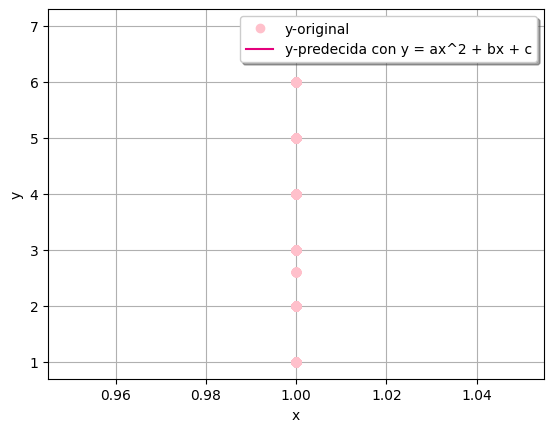

In [77]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_4,y_4, 'bo', color='pink', label='y-original')
plt.plot(x_4,y_pred_4A, color='#E4007C',label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [78]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_4A = r2_score(y_4, y_pred_4A)
r2_modelo_4A

-3.885780586188048e-14

In [79]:
#Calculamos el coeficiente de correlacion del modelo
r_4A = np.sqrt(abs(r2_modelo_4A))
r_4A

1.9712383382503618e-07

#### Modelo 2

In [80]:
#Definimos la funcion del modelo
#y = a*exp(-bx) + c   ("Función exponencial")
def func_4B(x,a,b,c):
  return a*np.exp(-b*x) + c

In [81]:
#Ajustamos los parametros de la funcion curve_fit
parametros_4B, covs_4B = curve_fit(func_4B, data_cuant['bedrooms'], data_cuant['accommodates'], maxfev=5000)

In [82]:
#Predicciones
y_pred_4B = func_4B(x_4, *parametros_4B)

<ipython-input-83-ef32e86a42e1>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_4,y_4, 'bo',color='pink', label='y-original')


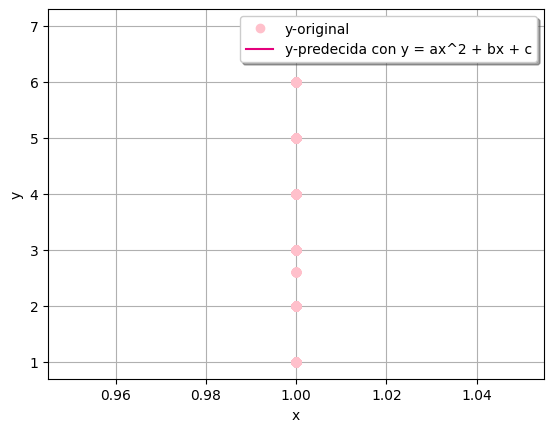

In [83]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_4,y_4, 'bo',color='pink', label='y-original')
plt.plot(x_4,y_pred_4B,color='#E4007C', label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [84]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_4B = r2_score(y_4, y_pred_4B)
r2_modelo_4B

-1.3191892023201035e-11

In [85]:
#Calculamos el coeficiente de correlacion del modelo
r_4B = np.sqrt(abs(r2_modelo_4B))
r_4B

3.6320644299352726e-06

### Reviews Per Month

In [86]:
#Declaramos las variables dependientes e independientes para la regresion No Lineal
x_5 = data_cuant[['number_of_reviews_l30d']]
y_5 = data_cuant[['reviews_per_month']]
# Coeficiente de Correlacion Lineal 0.473663

#### Modelo 1

In [87]:
#Definimos la funcion del modelo
#y = ax^2 + bx + c   ("Función cuadrática")
def func_5A(x,a,b,c):
  return a*x**2 + b*x + c

In [88]:
#Ajustamos los parametros de la funcion curve_fit
parametros_5A, covs_5A = curve_fit(func_5A, data_cuant['number_of_reviews_l30d'], data_cuant['reviews_per_month'], maxfev=5000)

In [89]:
#Predicciones
y_pred_5A = func_5A(x_5, *parametros_5A)

<ipython-input-90-dbc977e489fa>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_5,y_5, 'bo', color='pink',label='y-original')


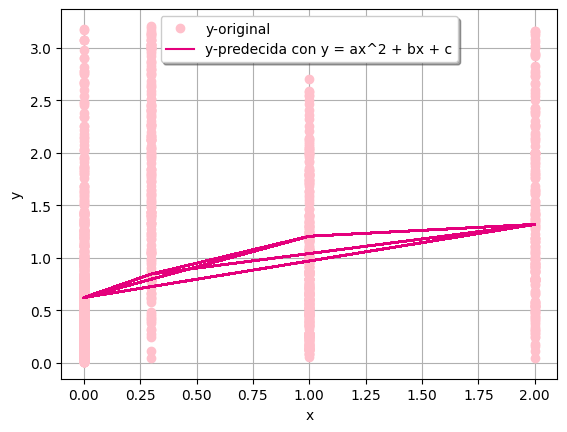

In [90]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_5,y_5, 'bo', color='pink',label='y-original')
plt.plot(x_5,y_pred_5A, color='#E4007C',label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [91]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_5A = r2_score(y_5, y_pred_5A)
r2_modelo_5A

0.14858998933806555

In [92]:
#Calculamos el coeficiente de correlacion del modelo
r_5A = np.sqrt(abs(r2_modelo_5A))
r_5A

0.38547372068412855

#### Modelo 2

In [93]:
#Definimos la funcion del modelo
#y = a*exp(-bx) + c   ("Función exponencial")
def func_5B(x,a,b,c):
  return a*np.exp(-b*x) + c

In [94]:
#Ajustamos los parametros de la funcion curve_fit
parametros_5B, covs_5B = curve_fit(func_5B, data_cuant['number_of_reviews_l30d'], data_cuant['reviews_per_month'], maxfev=5000)

In [95]:
#Predicciones
y_pred_5B = func_5B(x_5, *parametros_5B)

<ipython-input-96-4a22b7a7a0bb>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_5,y_5, 'bo', color='pink',label='y-original')


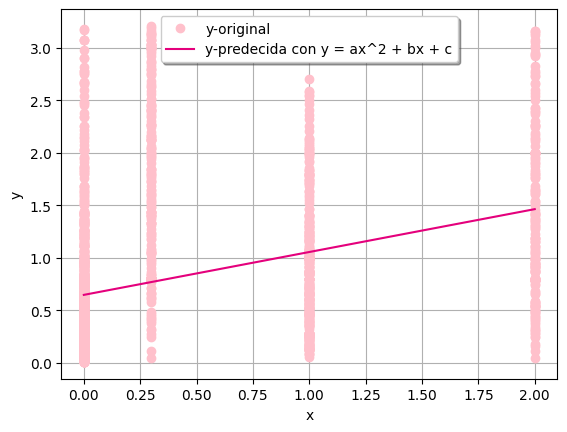

In [96]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_5,y_5, 'bo', color='pink',label='y-original')
plt.plot(x_5,y_pred_5B, color='#E4007C', label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [97]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_5B = r2_score(y_5, y_pred_5B)
r2_modelo_5B

0.1352263125577544

In [98]:
#Calculamos el coeficiente de correlacion del modelo
r_5B = np.sqrt(abs(r2_modelo_5B))
r_5B

0.36773130483785904

### Price

In [99]:
#Declaramos las variables dependientes e independientes para la regresion No Lineal
x_6 = data_cuant[['accommodates']]
y_6 = data_cuant[['price']]
# Coeficiente de Correlacion Lineal 0.413256

#### Modelo 1

In [100]:
#    y = ax^2 + bx + c   ("Función cuadrática")

#    y = a*exp(-bx) + c   ("Función exponencial")

#    y = 1/a*x           ("Función inversa")

#    y = a*np.sin(x) + b ("Función senoidal")

#    y = a*np.tan(x) + b ("Función tangencial")

#    y = a*np.abs(x) + b*x + c (Función Valor absoluto)

#    y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

#    y = a*np.log(x) + b  (Función logaritmica)

#    y = a*x + b*x + c*x (Función lineal con producto de coeficientes)

#    y = 1/a*x**2  (Función cuadrática inversa)

#    y = a/b*x**2 + c*x (Función polinomial inversa)

In [101]:
#Definimos la funcion del modelo
#y = ax^2 + bx + c   ("Función cuadrática")
def func_6A(x,a,b,c):
  return a*x**2 + b*x + c

In [102]:
#Ajustamos los parametros de la funcion curve_fit
parametros_6A, covs_6A = curve_fit(func_6A, data_cuant['accommodates'], data_cuant['price'], maxfev=5000)

In [103]:
#Predicciones
y_pred_6A = func_6A(x_6, *parametros_6A)

<ipython-input-104-5d3624dcc650>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_6,y_6, 'bo',color='pink', label='y-original')


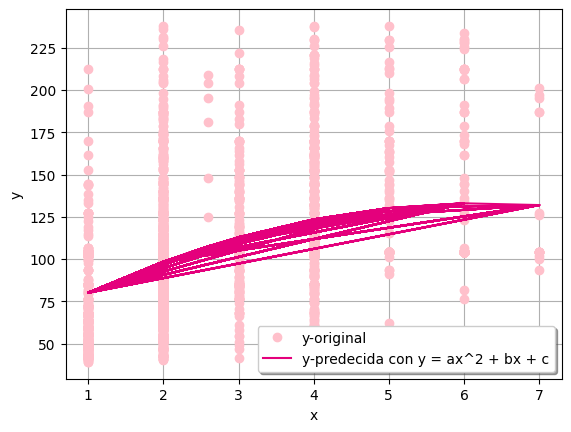

In [104]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_6,y_6, 'bo',color='pink', label='y-original')
plt.plot(x_6,y_pred_6A, color='#E4007C',label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [105]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_6A = r2_score(y_6, y_pred_6A)
r2_modelo_6A

0.18846906802788366

In [106]:
#Calculamos el coeficiente de correlacion del modelo
r_6A = np.sqrt(abs(r2_modelo_6A))
r_6A

0.43413024316198434

#### Modelo 2

In [107]:
#Definimos la funcion del modelo
#y = a*np.log(x) + b  (Función logaritmica)
def func_6B(x,a,b,c):
  return a*np.log(x) + b

In [108]:
#Ajustamos los parametros de la funcion curve_fit
parametros_6B, covs_6B = curve_fit(func_6B, data_cuant['accommodates'], data_cuant['price'], maxfev=5000)

<ipython-input-108-d20a2ace611c>:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros_6B, covs_6B = curve_fit(func_6B, data_cuant['accommodates'], data_cuant['price'], maxfev=5000)


In [109]:
#Predicciones
y_pred_6B = func_6B(x_6, *parametros_6B)

<ipython-input-110-8833ea3c8b15>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_6,y_6, 'bo',color='pink', label='y-original')


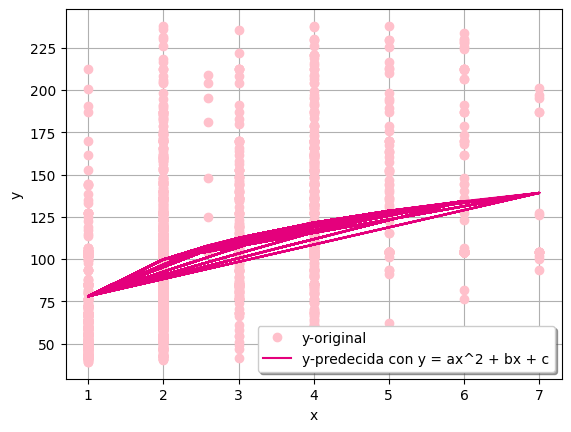

In [110]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x_6,y_6, 'bo',color='pink', label='y-original')
plt.plot(x_6,y_pred_6B, color='#E4007C',label='y-predecida con y = ax^2 + bx + c')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [111]:
#Calclamos el coeficiete de determinación del modelo
r2_modelo_6B = r2_score(y_6, y_pred_6B)
r2_modelo_6B

0.18811858843121942

In [112]:
#Calculamos el coeficiente de correlacion del modelo
r_6B = np.sqrt(abs(r2_modelo_6B))
r_6B

0.4337263981258455

### Tabla de Coeficientes de Determinación y Correlación

In [115]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[r2_modelo_1A,r2_modelo_1B,r2_modelo_2A,r2_modelo_2B,r2_modelo_3A,r2_modelo_3B,r2_modelo_4A,r2_modelo_4B,r2_modelo_5A,r2_modelo_5B,r2_modelo_6A,r2_modelo_6B],
             'Coef_Correl':[r_1A,r_1B,r_2A,r_2B,r_3A,r_3B,r_4A,r_4B,r_5A,r_5B,r_6A,r_6B]}

#Generar con llaves
df_coef_result = pd.DataFrame(coef_data,index=['Host Response Rate Modelo 1','Host Response Rate Modelo 2','Host Acceptance Rate Modelo 1','Host Acceptance Rate Modelo 2','Host Total Listings Count Modelo 1','Host Total Listings Count Modelo 2','Accommodates Modelo 1','Accommodates Modelo 2','Reviews Per Month Modelo 1','Reviews Per Month Modelo 2','Price Modelo 1','Price Modelo 2'])
df_coef_result

Coef_Deter   Coef_Correl
Host Response Rate Modelo 1         1.178724e-02  1.085690e-01
Host Response Rate Modelo 2         5.857971e-03  7.653738e-02
Host Acceptance Rate Modelo 1       1.852478e-02  1.361058e-01
Host Acceptance Rate Modelo 2       1.309792e-02  1.144461e-01
Host Total Listings Count Modelo 1  3.496393e-01  5.913030e-01
Host Total Listings Count Modelo 2  3.254679e-01  5.704980e-01
Accommodates Modelo 1              -3.885781e-14  1.971238e-07
Accommodates Modelo 2              -1.319189e-11  3.632064e-06
Reviews Per Month Modelo 1          1.485900e-01  3.854737e-01
Reviews Per Month Modelo 2          1.352263e-01  3.677313e-01
Price Modelo 1                      1.884691e-01  4.341302e-01
Price Modelo 2                      1.881186e-01  4.337264e-01